In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
calories = pd.read_csv("./archive/calories.csv")

In [64]:
calories.head(10)

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
5,15130815,123.0
6,19602372,112.0
7,11117088,143.0
8,12132339,134.0
9,17964668,72.0


In [65]:
exercise = pd.read_csv("./archive/exercise.csv")

In [66]:
exercise.head(10)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
5,15130815,female,36,151.0,50.0,23.0,96.0,40.7
6,19602372,female,33,158.0,56.0,22.0,95.0,40.5
7,11117088,male,41,175.0,85.0,25.0,100.0,40.7
8,12132339,male,60,186.0,94.0,21.0,97.0,40.4
9,17964668,female,26,146.0,51.0,16.0,90.0,40.2


In [67]:
exercise.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [68]:
exercise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 937.6+ KB


In [69]:
df = pd.get_dummies(pd.concat([exercise, calories], axis=1).drop("User_ID", axis=1), drop_first=True).astype(int)

In [70]:
df

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_male
0,68,190,94,29,105,40,231,1
1,20,166,60,14,94,40,66,0
2,69,179,79,5,88,38,26,1
3,34,179,71,13,100,40,71,0
4,27,154,58,10,81,39,35,0
...,...,...,...,...,...,...,...,...
14995,20,193,86,11,92,40,45,0
14996,27,165,65,6,85,39,23,0
14997,43,159,58,16,90,40,75,0
14998,78,193,97,2,84,38,11,1


<Axes: xlabel='Gender_male', ylabel='Calories'>

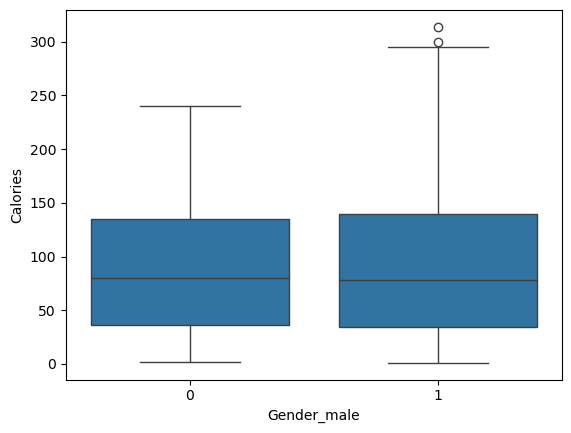

In [71]:
sns.boxplot(data=df, x="Gender_male", y="Calories")

<Axes: xlabel='Height', ylabel='Calories'>

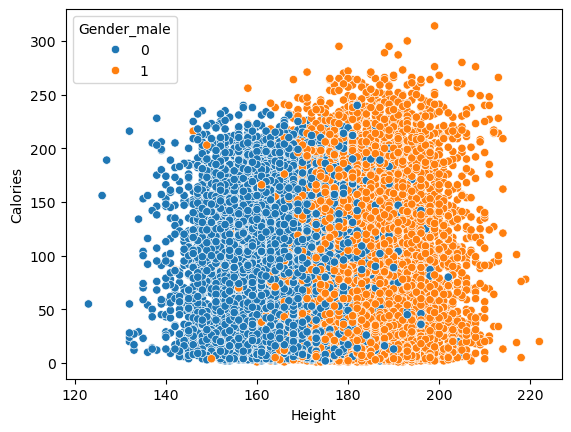

In [72]:
sns.scatterplot(data=df, x="Height", y="Calories", hue="Gender_male")

<Axes: xlabel='Body_Temp', ylabel='Heart_Rate'>

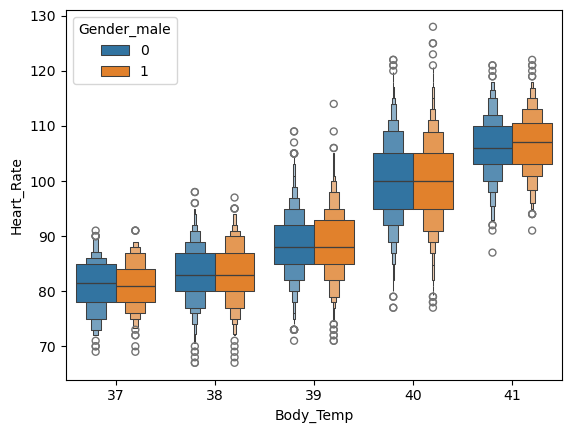

In [73]:
sns.boxenplot(data=df, x="Body_Temp", y="Heart_Rate", hue="Gender_male")

<Axes: >

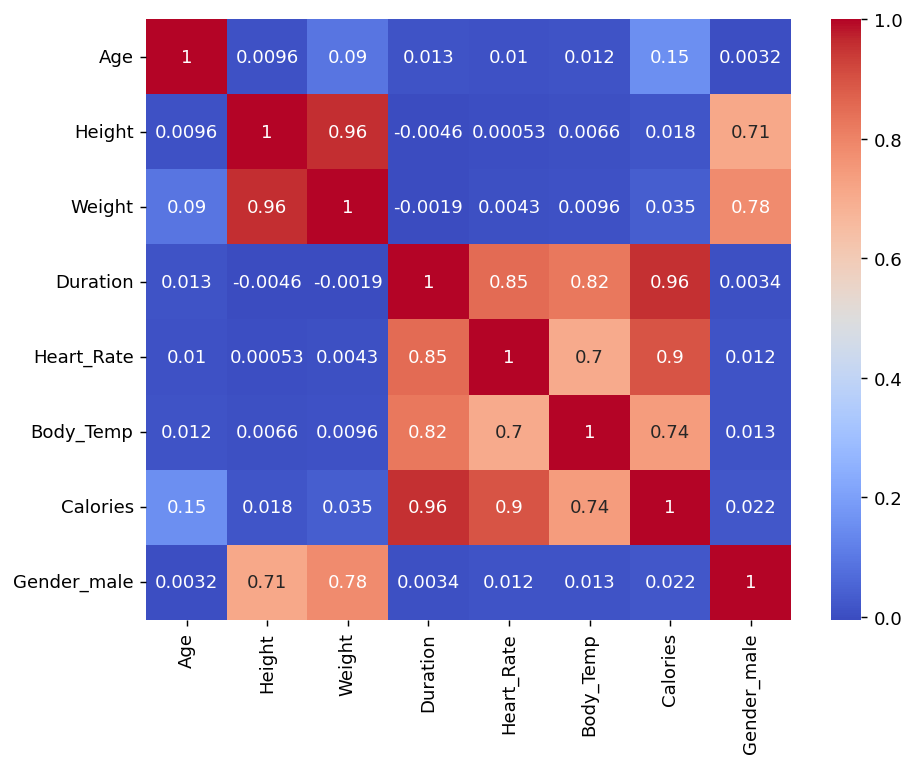

In [74]:
plt.figure(figsize=(8, 6), dpi=130)
sns.heatmap(data=df.corr(numeric_only=True), cmap="coolwarm", annot=True)

In [75]:
df["Age"].value_counts()

Age
20    512
21    497
22    489
26    452
25    435
24    426
23    411
27    396
28    390
29    379
32    370
31    339
35    327
30    325
33    320
38    311
34    285
37    283
36    279
39    276
40    260
44    259
42    257
41    252
43    250
46    233
45    233
52    225
47    223
50    220
48    219
54    217
49    208
55    204
53    201
59    198
51    197
56    190
63    182
58    182
61    181
62    180
57    177
64    176
60    172
65    169
73    167
71    163
67    162
70    154
68    150
79    147
66    147
69    145
74    142
76    139
72    137
78    133
77    130
75    117
Name: count, dtype: int64

In [76]:
df.isnull().sum()

Age            0
Height         0
Weight         0
Duration       0
Heart_Rate     0
Body_Temp      0
Calories       0
Gender_male    0
dtype: int64

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X = df.drop("Calories", axis=1)
y = df["Calories"]

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [255]:
len(X_train)

12000

In [259]:
X.head(10)

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Gender_male
0,68,190,94,29,105,40,1
1,20,166,60,14,94,40,0
2,69,179,79,5,88,38,1
3,34,179,71,13,100,40,0
4,27,154,58,10,81,39,0
5,36,151,50,23,96,40,0
6,33,158,56,22,95,40,0
7,41,175,85,25,100,40,1
8,60,186,94,21,97,40,1
9,26,146,51,16,90,40,0


In [261]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          15000 non-null  int32
 1   Height       15000 non-null  int32
 2   Weight       15000 non-null  int32
 3   Duration     15000 non-null  int32
 4   Heart_Rate   15000 non-null  int32
 5   Body_Temp    15000 non-null  int32
 6   Gender_male  15000 non-null  int32
dtypes: int32(7)
memory usage: 410.3 KB


In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
scaler = StandardScaler()

In [83]:
scaler.fit(X_train)

StandardScaler()

In [84]:
scaled_X_train = scaler.transform(X_train)

In [85]:
scaled_X_test = scaler.transform(X_test)

In [86]:
from sklearn.linear_model import ElasticNet

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
elastic_model = ElasticNet()
param_grid = {"alpha": [0.01, 0.1, 0.5, 1, 10, 50, 70, 100, 200], "l1_ratio": [.01, .1, .3, .5, .7, .9, .95, .99, 1]}
grid_elastic_model = GridSearchCV(estimator=elastic_model, param_grid=param_grid, cv=10, verbose=1)

In [89]:
grid_elastic_model.fit(scaled_X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 10, 50, 70, 100, 200],
                         'l1_ratio': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99,
                                      1]},
             verbose=1)

In [90]:
grid_elastic_model.best_params_

{'alpha': 0.01, 'l1_ratio': 1}

In [91]:
elastic_preds = grid_elastic_model.predict(scaled_X_test)

In [92]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [93]:
mean_absolute_error(y_test, elastic_preds)

8.62044319918902

In [94]:
np.sqrt(mean_squared_error(y_test, elastic_preds))

11.70932170271692

In [95]:
from sklearn.preprocessing import PolynomialFeatures

In [96]:
poly_converter = PolynomialFeatures(degree=2, include_bias=False)

In [97]:
poly_features = poly_converter.fit_transform(X)

In [98]:
poly_features.shape

(15000, 35)

In [99]:
poly_features[0]

array([6.8000e+01, 1.9000e+02, 9.4000e+01, 2.9000e+01, 1.0500e+02,
       4.0000e+01, 1.0000e+00, 4.6240e+03, 1.2920e+04, 6.3920e+03,
       1.9720e+03, 7.1400e+03, 2.7200e+03, 6.8000e+01, 3.6100e+04,
       1.7860e+04, 5.5100e+03, 1.9950e+04, 7.6000e+03, 1.9000e+02,
       8.8360e+03, 2.7260e+03, 9.8700e+03, 3.7600e+03, 9.4000e+01,
       8.4100e+02, 3.0450e+03, 1.1600e+03, 2.9000e+01, 1.1025e+04,
       4.2000e+03, 1.0500e+02, 1.6000e+03, 4.0000e+01, 1.0000e+00])

In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
X_poly_train, X_poly_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=2)

In [102]:
linear_model = LinearRegression()

In [103]:
poly_scaler = StandardScaler()
poly_scaler.fit(X_poly_train)
scaled_X_poly_train = poly_scaler.transform(X_poly_train)
scaled_X_poly_test = poly_scaler.transform(X_poly_test)

In [104]:
linear_model.fit(scaled_X_poly_train, y_train)

LinearRegression()

In [105]:
linear_model.coef_

array([-4.01797402e+00, -5.54474261e-01, -2.65419760e+00, -6.06174981e+01,
       -1.07359558e+01,  1.92027224e+00,  4.76618908e+00, -3.41729115e-01,
       -5.99025874e-01, -2.02354428e-01,  1.48329931e+01, -6.28710416e-01,
        1.95264111e+00,  1.18118415e+01,  5.77725451e+00, -1.05878398e+01,
       -1.97437159e+01, -3.98933915e-01,  1.14668927e+00,  1.81278720e+00,
        4.72124279e+00,  1.38012775e+01,  1.56662254e+00, -3.51268646e+00,
        2.24513543e+01,  5.42648914e-02,  1.17015708e+02, -1.19488953e+00,
        4.36770787e-01,  8.61750833e-01,  8.01135282e+00,  3.11459270e+01,
       -1.80312707e+00, -7.15081534e+01,  4.76618908e+00])

In [106]:
linear_preds = linear_model.predict(scaled_X_poly_test)

In [107]:
mean_absolute_error(y_test, linear_preds)

2.2602095951157533

In [108]:
np.sqrt(mean_squared_error(y_test, linear_preds))

3.0698566114948354

In [109]:
train_rmse_errors = []
test_rmse_errors = []


#tests the Linear model with different degrees of polynomial features to find at what point the model starts overfitting the data
for d in range(1, 8):
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=2)
    scaler = StandardScaler()
    scaler.fit(X_train)
    scaled_X_train = scaler.transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    model = LinearRegression(fit_intercept=True)
    model.fit(scaled_X_train,y_train)
    train_pred = model.predict(scaled_X_train)
    test_pred = model.predict(scaled_X_test)
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

In [110]:
test_rmse_errors

[11.71005838842163,
 3.0698566114948354,
 0.29124261731442547,
 0.2935027081568996,
 0.30174260521034346,
 0.34932455613976604,
 0.5801503839853054]

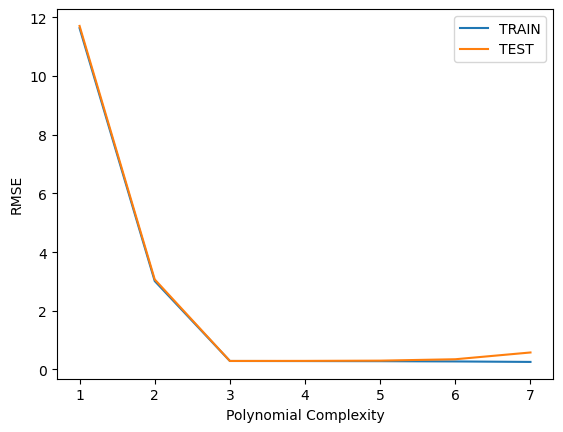

In [111]:
plt.plot(range(1,8),train_rmse_errors,label='TRAIN')
plt.plot(range(1,8),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

Polynomial complexity of 3 looks to be about the right choice.

In [113]:
polynomial_converter = PolynomialFeatures(degree=3,include_bias=False)
poly_features = polynomial_converter.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=2)
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)
param_grid = {"alpha": [0.01, 0.1, 0.5, 1, 10, 50, 70, 100, 200], "l1_ratio": [.01, .1, .3, .5, .7, .9, .95, .99, 1], "max_iter": [100000]}
elastic = ElasticNet()
elastic_poly_model = GridSearchCV(estimator=elastic, param_grid=param_grid, verbose=1, cv=10)
elastic_poly_model.fit(scaled_X_train,y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 10, 50, 70, 100, 200],
                         'l1_ratio': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99,
                                      1],
                         'max_iter': [100000]},
             verbose=1)

In [114]:
test_pred = elastic_poly_model.predict(scaled_X_test)

In [115]:
mean_absolute_error(y_test, test_pred)

0.5593407783673832

In [116]:
mean_squared_error(y_test, test_pred)

0.5902313839924095

In [117]:
elastic_poly_model.best_params_

{'alpha': 0.01, 'l1_ratio': 1, 'max_iter': 100000}

In [118]:
from sklearn.svm import SVR

In [119]:
param_grid = {'C':[0.1,0.5,1,2,4,7,9], 'kernel':['linear','rbf'], 'gamma':['scale'], 'degree':[2,3,4, 5], 'epsilon':[0,0.01,0.1,0.5,1,2]}

In [263]:
svr = SVR()

In [275]:
type(X)

pandas.core.frame.DataFrame

In [121]:
grid_svr = GridSearchCV(estimator=svr, param_grid=param_grid, verbose=1, cv=10)

In [122]:
grid_svr.fit(scaled_X_train, y_train)

Fitting 10 folds for each of 336 candidates, totalling 3360 fits


GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.1, 0.5, 1, 2, 4, 7, 9], 'degree': [2, 3, 4, 5],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale'], 'kernel': ['linear', 'rbf']},
             verbose=1)

In [186]:
grid_svr.best_params_

{'C': 9, 'degree': 2, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

Best params: {'C': 9, 'degree': 2, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

In [199]:
y_svr_preds = grid_svr.predict(scaled_X_test)

In [201]:
mean_absolute_error(y_test, y_svr_preds)

0.2544397142219435

In [203]:
mean_squared_error(y_test, y_svr_preds)

0.0885283589110274

In [207]:
len(scaled_X_train[0])

119

In [209]:
final_model = SVR(C=9, degree=2, epsilon=0.1, gamma="scale", kernel="linear")

In [215]:
poly_features.shape

(15000, 119)

In [217]:
final_scaler = StandardScaler()

In [223]:
final_scaled_X = final_scaler.fit_transform(poly_features)

In [225]:
final_scaled_X

array([[ 1.48472604,  1.08958204,  1.26590864, ...,  1.04902328,
         1.02876587,  1.00709181],
       [-1.34217934, -0.59372619, -0.99545805, ..., -0.99138911,
        -0.99255724, -0.99295813],
       [ 1.5436199 ,  0.31806577,  0.26824686, ...,  0.85008307,
         0.92769972,  1.00709181],
       ...,
       [ 0.01237949, -1.08469109, -1.12847962, ..., -0.99138911,
        -0.99255724, -0.99295813],
       [ 2.07366466,  1.29999557,  1.465441  , ...,  0.85008307,
         0.92769972,  1.00709181],
       [ 1.19025673, -0.10276129,  0.26824686, ...,  1.04902328,
         1.02876587,  1.00709181]])

In [227]:
final_model.fit(final_scaled_X, y)

SVR(C=9, degree=2, kernel='linear')

In [235]:
final_y_preds = final_model.predict(final_scaled_X)

In [237]:
mean_absolute_error(y, final_y_preds)

0.25453377945667877

In [243]:
import joblib

In [247]:
joblib.dump(polynomial_converter, "final_poly_converter.pkl")

['final_poly_converter.pkl']

In [249]:
joblib.dump(final_scaler, "final_scaler.pkl")

['final_scaler.pkl']

In [253]:
joblib.dump(final_model, "final_model.pkl")

['final_model.pkl']

In [279]:
test_converter = polynomial_converter.transform([[40, 180, 90, 45, 100, 40, 1]])

C:\Users\honer\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [285]:
example = final_scaler.transform(test_converter)

In [289]:
final_model.predict(example)

array([262.53483207])

In [283]:
test_converter.shape

(1, 119)